In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense

In [8]:
notes = pd.read_csv('/content/banknotes.csv')
notes.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [9]:
from tensorflow.keras.models import Sequential

In [10]:
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
stopper = EarlyStopping(patience=2, monitor='val_loss')

In [12]:
predictors = np.array(notes.drop('class', axis=1), np.float32)

In [13]:
label = notes['class']

In [14]:
model = Sequential()

In [15]:
model.add(Dense(35, activation='relu', input_shape=(4,)))

In [16]:
model.add(Dense(1, activation='sigmoid'))

In [17]:
model.compile('adam', loss='binary_crossentropy')

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(predictors, label, test_size=0.25)

In [20]:
model.fit(X_train,y_train, epochs=20, validation_data=(X_test, y_test), callbacks=[stopper])

Epoch 1/20
33/33 [==============================] - 1s 5ms/step - loss: 1.0790 - val_loss: 0.7416
Epoch 2/20
33/33 [==============================] - 0s 2ms/step - loss: 0.5940 - val_loss: 0.4495
Epoch 3/20
33/33 [==============================] - 0s 2ms/step - loss: 0.3809 - val_loss: 0.3215
Epoch 4/20
33/33 [==============================] - 0s 2ms/step - loss: 0.2788 - val_loss: 0.2476
Epoch 5/20
33/33 [==============================] - 0s 2ms/step - loss: 0.2175 - val_loss: 0.1983
Epoch 6/20
33/33 [==============================] - 0s 2ms/step - loss: 0.1752 - val_loss: 0.1617
Epoch 7/20
33/33 [==============================] - 0s 2ms/step - loss: 0.1446 - val_loss: 0.1358
Epoch 8/20
33/33 [==============================] - 0s 2ms/step - loss: 0.1225 - val_loss: 0.1166
Epoch 9/20
33/33 [==============================] - 0s 2ms/step - loss: 0.1052 - val_loss: 0.1012
Epoch 10/20
33/33 [==============================] - 0s 2ms/step - loss: 0.0918 - val_loss: 0.0896
Epoch 11/20
33/33 [

In [21]:
model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 1ms/step - loss: 0.0284


0.028400760143995285

In [22]:
preds = np.array(model.predict(X_test))

11/11 [==============================] - 0s 1ms/step


In [23]:
preds2=[]
for pred in preds:
  if (pred >= 0.5):
    res=1
  else:
      res=0
  preds2.append(res)

In [24]:
preds2[:10]

[0, 1, 0, 1, 1, 0, 0, 0, 0, 0]

In [25]:
y_test[:10]

570     0
1137    1
562     0
768     1
1034    1
401     0
11      0
167     0
179     0
577     0
Name: class, dtype: int64

In [26]:
(preds2==y_test).sum()/len(y_test)

1.0

In [27]:
darts= pd.read_csv('/content/darts.csv')
darts.head()

,xCoord,yCoord,competitor
0,0.196451,-0.520341,Steve
1,0.476027,-0.306763,Susan
2,0.003175,-0.980736,Michael
3,0.294078,0.267566,Kate
4,-0.051120,0.598946,Steve


In [28]:
features2= np.array(darts[['xCoord', 'yCoord']], np.float32)

In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
from tensorflow import constant

In [31]:
labels2 = pd.get_dummies(darts['competitor'])
labels2.head(3)

,Kate,Michael,Steve,Susan
0,0,0,1,0
1,0,0,0,1
2,0,1,0,0


In [32]:
darts['competitor'] = pd.Categorical(darts['competitor'])
darts.loc[:5, 'competitor']

0      Steve
1      Susan
2    Michael
3       Kate
4      Steve
5       Kate
Name: competitor, dtype: category
Categories (4, object): ['Kate', 'Michael', 'Steve', 'Susan']

In [33]:
darts['competitor']= darts['competitor'].cat.codes

In [34]:
darts.head()

,xCoord,yCoord,competitor
0,0.196451,-0.520341,2
1,0.476027,-0.306763,3
2,0.003175,-0.980736,1
3,0.294078,0.267566,0
4,-0.051120,0.598946,2


In [35]:
labels2_2 = to_categorical(darts.competitor)
labels2_2[:3]

array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]], dtype=float32)

In [36]:
labels2[:5]

,Kate,Michael,Steve,Susan
0,0,0,1,0
1,0,0,0,1
2,0,1,0,0
3,1,0,0,0
4,0,0,1,0


In [37]:
labels2_1 = constant(labels2)
labels2_1[:3]

<tf.Tensor: shape=(3, 4), dtype=uint8, numpy=
array([[0, 0, 1, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0]], dtype=uint8)>

In [38]:
model2 = Sequential()

In [39]:
model2.add(Dense(15, activation='sigmoid', input_shape=(2,)))

In [40]:
model2.add(Dense(10, activation='sigmoid'))

In [41]:
model2.add(Dense(4, activation='softmax'))

In [42]:
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
X2_train, X2_test, y2_train, y2_test = train_test_split(features2, labels2_1.numpy(), train_size=0.25, stratify=labels2)

In [44]:
stopper2= EarlyStopping(patience=3, monitor='val_loss')

In [45]:
model2.fit(X2_train, y2_train, epochs=20, callbacks=[stopper2], validation_split=0.2)

Epoch 1/20
5/5 [==============================] - 0s 34ms/step - loss: 1.3981 - accuracy: 0.2562 - val_loss: 1.3904 - val_accuracy: 0.2250
Epoch 2/20
5/5 [==============================] - 0s 10ms/step - loss: 1.3970 - accuracy: 0.2562 - val_loss: 1.3902 - val_accuracy: 0.2250
Epoch 3/20
5/5 [==============================] - 0s 6ms/step - loss: 1.3959 - accuracy: 0.2562 - val_loss: 1.3900 - val_accuracy: 0.2250
Epoch 4/20
5/5 [==============================] - 0s 6ms/step - loss: 1.3949 - accuracy: 0.2562 - val_loss: 1.3899 - val_accuracy: 0.2250
Epoch 5/20
5/5 [==============================] - 0s 8ms/step - loss: 1.3941 - accuracy: 0.2562 - val_loss: 1.3899 - val_accuracy: 0.2250
Epoch 6/20
5/5 [==============================] - 0s 6ms/step - loss: 1.3936 - accuracy: 0.2562 - val_loss: 1.3899 - val_accuracy: 0.2250
Epoch 7/20
5/5 [==============================] - 0s 10ms/step - loss: 1.3927 - accuracy: 0.2562 - val_loss: 1.3899 - val_accuracy: 0.2250
Epoch 8/20
5/5 [===============

In [46]:
model2.predict(X2_test)

19/19 [==============================] - 0s 943us/step


array([[0.2648063 , 0.22231674, 0.23673087, 0.27614605],
       [0.26400906, 0.21807536, 0.2433179 , 0.27459776],
       [0.26505202, 0.22441432, 0.23273465, 0.27779895],
       ...,
       [0.2627739 , 0.21525186, 0.24275714, 0.27921706],
       [0.26463   , 0.22283888, 0.23407112, 0.2784599 ],
       [0.26382816, 0.21976241, 0.23712638, 0.27928308]], dtype=float32)

In [47]:
def create_model(nl= 3, nn=10, optimizer='adam', activation='relu'):
  model = Sequential()
  model.add(Dense(nn, activation=activation, input_shape=(2,)))
  for f in range(nl):
    model.add(Dense(nn, activation=activation))

  model.add(Dense(4, activation='softmax'))
  model.compile(optimizer=optimizer, loss='categorical_crossentropy')
  return model

In [48]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [49]:
model3 = KerasClassifier(build_fn=create_model, epochs=5, batch_size=16, callbacks=stopper2)

<ipython-input-49-3cb695865254>:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model3 = KerasClassifier(build_fn=create_model, epochs=5, batch_size=16, callbacks=stopper2)


In [50]:
from sklearn.model_selection import RandomizedSearchCV

In [51]:
params = {'nl': [1,2,3], 'nn': [5,10,20], 'optimizer': ['adam'], 'activation': ['relu', 'sigmoid', 'tanh'], 'batch_size':[5,10,30,50]}

In [52]:
cv = RandomizedSearchCV(model3, param_distributions=params, cv=3)

In [53]:
cv.fit(X2_train, y2_train)

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........2
.........3
.........4
.........5
.........6
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:39        22952
config.json                                    2023-02-17 22:17:39         1837
metadata.json                                  2023-02-17 22:17:39           64
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22

14/14 [==============================] - 0s 2ms/step - loss: 1.4781
Epoch 2/5
 1/14 [=>............................] - ETA: 0s - loss: 1.3662

14/14 [==============================] - 0s 2ms/step - loss: 1.4583
Epoch 3/5
 1/14 [=>............................] - ETA: 0s - loss: 1.3322

14/14 [==============================] - 0s 2ms/step - loss: 1.4452
Epoch 4/5
 1/14 [=>............................] - ETA: 0s - loss: 1.5045

14/14 [==============================] - 0s 2ms/step - loss: 1.4312
Epoch 5/5
 1/14 [=>............................] - ETA: 0s - loss: 1.3858

7/7 [==============================] - 0s 2ms/step - loss: 1.4075
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:40        15072
config.json                                    2023-02-17 22:17:40         1837
metadata.json                                  2023-02-17 22:17:40           64
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:40        15072
config.json                                    2023-02-17 22:17:40         1837
metadata.json                   

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Epoch 1/5
 1/14 [=>............................] - ETA: 7s - loss: 1.3174

14/14 [==============================] - 1s 3ms/step - loss: 1.4052
Epoch 2/5
 1/14 [=>............................] - ETA: 0s - loss: 1.3084

14/14 [==============================] - 0s 3ms/step - loss: 1.3995
Epoch 3/5
 1/14 [=>............................] - ETA: 0s - loss: 1.5317

14/14 [==============================] - 0s 2ms/step - loss: 1.3946
Epoch 4/5
 1/14 [=>............................] - ETA: 0s - loss: 1.3692

14/14 [==============================] - 0s 2ms/step - loss: 1.3907
Epoch 5/5
 1/14 [=>............................] - ETA: 0s - loss: 1.3931

7/7 [==============================] - 0s 1ms/step - loss: 1.4119
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:41        15072
config.json                                    2023-02-17 22:17:41         1837
metadata.json                                  2023-02-17 22:17:41           64
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:40        15072
config.json                                    2023-02-17 22:17:40         1837
metadata.json                   

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Epoch 1/5
 1/14 [=>............................] - ETA: 5s - loss: 1.4011

14/14 [==============================] - 0s 1ms/step - loss: 1.4658
Epoch 2/5
 1/14 [=>............................] - ETA: 0s - loss: 1.2767

14/14 [==============================] - 0s 1ms/step - loss: 1.4463
Epoch 3/5
 1/14 [=>............................] - ETA: 0s - loss: 1.2950

14/14 [==============================] - 0s 1ms/step - loss: 1.4339
Epoch 4/5
 1/14 [=>............................] - ETA: 0s - loss: 1.6081

14/14 [==============================] - 0s 1ms/step - loss: 1.4216
Epoch 5/5
 1/14 [=>............................] - ETA: 0s - loss: 1.2985

7/7 [==============================] - 0s 2ms/step - loss: 1.4402


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:42        15072
config.json                                    2023-02-17 22:17:42         1837
metadata.json                                  2023-02-17 22:17:42           64
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:42        15072
config.json                                    2023-02-17 22:17:42         1837
metadata.json                                  2023-02-17 22:17:42           64
Keras weights file

5/5 [==============================] - 1s 3ms/step - loss: 1.3806
Epoch 2/5
1/5 [=====>........................] - ETA: 0s - loss: 1.3809

5/5 [==============================] - 0s 5ms/step - loss: 1.3772
Epoch 3/5
1/5 [=====>........................] - ETA: 0s - loss: 1.3860

5/5 [==============================] - 0s 5ms/step - loss: 1.3751
Epoch 4/5
1/5 [=====>........................] - ETA: 0s - loss: 1.3685

5/5 [==============================] - 0s 6ms/step - loss: 1.3731
Epoch 5/5
1/5 [=====>........................] - ETA: 0s - loss: 1.3633

3/3 [==============================] - 0s 3ms/step - loss: 1.3956
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:44        15072
config.json                                    2023-02-17 22:17:44         1837
metadata.json                                  2023-02-17 22:17:44           64
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:44        15072
config.json                                    2023-02-17 22:17:44         1837
metadata.json                   

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Epoch 1/5
1/5 [=====>........................] - ETA: 3s - loss: 1.4178

5/5 [==============================] - 1s 3ms/step - loss: 1.4012
Epoch 2/5
1/5 [=====>........................] - ETA: 0s - loss: 1.3953

5/5 [==============================] - 0s 4ms/step - loss: 1.3978
Epoch 3/5
1/5 [=====>........................] - ETA: 0s - loss: 1.3904

5/5 [==============================] - 0s 3ms/step - loss: 1.3946
Epoch 4/5
1/5 [=====>........................] - ETA: 0s - loss: 1.3919

5/5 [==============================] - 0s 2ms/step - loss: 1.3924
Epoch 5/5
1/5 [=====>........................] - ETA: 0s - loss: 1.3839

3/3 [==============================] - 0s 3ms/step - loss: 1.3973


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:45        15072
config.json                                    2023-02-17 22:17:45         1837
metadata.json                                  2023-02-17 22:17:45           64
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:44        15072
config.json                                    2023-02-17 22:17:44         1837
metadata.json                                  2023-02-17 22:17:44           64
Keras weights file

5/5 [==============================] - 1s 3ms/step - loss: 1.3748
Epoch 2/5
1/5 [=====>........................] - ETA: 0s - loss: 1.3722

5/5 [==============================] - 0s 3ms/step - loss: 1.3715
Epoch 3/5
1/5 [=====>........................] - ETA: 0s - loss: 1.3712

5/5 [==============================] - 0s 3ms/step - loss: 1.3690
Epoch 4/5
1/5 [=====>........................] - ETA: 0s - loss: 1.3623

5/5 [==============================] - 0s 2ms/step - loss: 1.3662
Epoch 5/5
1/5 [=====>........................] - ETA: 0s - loss: 1.3643

3/3 [==============================] - 0s 4ms/step - loss: 1.3540


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:46        15072
config.json                                    2023-02-17 22:17:46         1837
metadata.json                                  2023-02-17 22:17:46           64
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:46        15072
config.json                                    2023-02-17 22:17:46         1837
metadata.json                                  2023-02-17 22:17:46           64
Keras weights file

3/3 [==============================] - 0s 5ms/step - loss: 1.3927
Epoch 2/5
1/3 [=========>....................] - ETA: 0s - loss: 1.3580

3/3 [==============================] - 0s 3ms/step - loss: 1.3908
Epoch 3/5
1/3 [=========>....................] - ETA: 0s - loss: 1.4169

3/3 [==============================] - 0s 5ms/step - loss: 1.3896
Epoch 4/5
1/3 [=========>....................] - ETA: 0s - loss: 1.3846

3/3 [==============================] - 0s 4ms/step - loss: 1.3882
Epoch 5/5
1/3 [=========>....................] - ETA: 0s - loss: 1.3684

3/3 [==============================] - 0s 3ms/step - loss: 1.3870


2/2 [==============================] - 0s 5ms/step - loss: 1.4136
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:47        15072
config.json                                    2023-02-17 22:17:47         1837
metadata.json                                  2023-02-17 22:17:47           64
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:46        15072
config.json                                    2023-02-17 22:17:46         1837
metadata.json                                  2023-02-17 22:17:46           64
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
....

3/3 [==============================] - 0s 4ms/step - loss: 1.3886
Epoch 2/5
1/3 [=========>....................] - ETA: 0s - loss: 1.3973

3/3 [==============================] - 0s 4ms/step - loss: 1.3871
Epoch 3/5
1/3 [=========>....................] - ETA: 0s - loss: 1.3674

3/3 [==============================] - 0s 5ms/step - loss: 1.3861
Epoch 4/5
1/3 [=========>....................] - ETA: 0s - loss: 1.3709

3/3 [==============================] - 0s 5ms/step - loss: 1.3852
Epoch 5/5
1/3 [=========>....................] - ETA: 0s - loss: 1.3721

3/3 [==============================] - 0s 4ms/step - loss: 1.3844


2/2 [==============================] - 0s 7ms/step - loss: 1.4403


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:48        15072
config.json                                    2023-02-17 22:17:48         1837
metadata.json                                  2023-02-17 22:17:48           64
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:48        15072
config.json                                    2023-02-17 22:17:48         1837
metadata.json                                  2023-02-17 22:17:48           64
Keras weights file

3/3 [==============================] - 0s 4ms/step - loss: 1.4388
Epoch 2/5
1/3 [=========>....................] - ETA: 0s - loss: 1.4220

3/3 [==============================] - 0s 4ms/step - loss: 1.4359
Epoch 3/5
1/3 [=========>....................] - ETA: 0s - loss: 1.4509

3/3 [==============================] - 0s 4ms/step - loss: 1.4332
Epoch 4/5
1/3 [=========>....................] - ETA: 0s - loss: 1.4674

3/3 [==============================] - 0s 4ms/step - loss: 1.4308
Epoch 5/5
1/3 [=========>....................] - ETA: 0s - loss: 1.3949

2/2 [==============================] - 0s 4ms/step - loss: 1.3859


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:49        15072
config.json                                    2023-02-17 22:17:49         1837
metadata.json                                  2023-02-17 22:17:49           64
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:48        15072
config.json                                    2023-02-17 22:17:48         1837
metadata.json                                  2023-02-17 22:17:48           64
Keras weights file

14/14 [==============================] - 1s 1ms/step - loss: 1.3896
Epoch 2/5
 1/14 [=>............................] - ETA: 0s - loss: 1.3368

14/14 [==============================] - 0s 1ms/step - loss: 1.3797
Epoch 3/5
 1/14 [=>............................] - ETA: 0s - loss: 1.3821

14/14 [==============================] - 0s 2ms/step - loss: 1.3762
Epoch 4/5
 1/14 [=>............................] - ETA: 0s - loss: 1.3663

14/14 [==============================] - 0s 2ms/step - loss: 1.3730
Epoch 5/5
 1/14 [=>............................] - ETA: 0s - loss: 1.4510

7/7 [==============================] - 0s 2ms/step - loss: 1.4082
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:50        15072
config.json                                    2023-02-17 22:17:50         1837
metadata.json                                  2023-02-17 22:17:50           64
Keras model archive loading:


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:50        15072
config.json                                    2023-02-17 22:17:50         1837
metadata.json                                  2023-02-17 22:17:50           64
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
va

14/14 [==============================] - 1s 2ms/step - loss: 1.3857
Epoch 2/5
 1/14 [=>............................] - ETA: 0s - loss: 1.3189

14/14 [==============================] - 0s 2ms/step - loss: 1.3781
Epoch 3/5
 1/14 [=>............................] - ETA: 0s - loss: 1.3429

14/14 [==============================] - 0s 3ms/step - loss: 1.3757
Epoch 4/5
 1/14 [=>............................] - ETA: 0s - loss: 1.2944

14/14 [==============================] - 0s 2ms/step - loss: 1.3739
Epoch 5/5
 1/14 [=>............................] - ETA: 0s - loss: 1.3451

7/7 [==============================] - 0s 2ms/step - loss: 1.4141


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:52        15072
config.json                                    2023-02-17 22:17:52         1837
metadata.json                                  2023-02-17 22:17:52           64
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:52        15072
config.json                                    2023-02-17 22:17:52         1837
metadata.json                                  2023-02-17 22:17:52           64
Keras weights file

14/14 [==============================] - 1s 2ms/step - loss: 1.3916
Epoch 2/5
 1/14 [=>............................] - ETA: 0s - loss: 1.3500

14/14 [==============================] - 0s 2ms/step - loss: 1.3742
Epoch 3/5
 1/14 [=>............................] - ETA: 0s - loss: 1.4109

14/14 [==============================] - 0s 2ms/step - loss: 1.3644
Epoch 4/5
 1/14 [=>............................] - ETA: 0s - loss: 1.2868

14/14 [==============================] - 0s 3ms/step - loss: 1.3606
Epoch 5/5
 1/14 [=>............................] - ETA: 0s - loss: 1.3949

7/7 [==============================] - 0s 2ms/step - loss: 1.4335


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:53        15072
config.json                                    2023-02-17 22:17:53         1837
metadata.json                                  2023-02-17 22:17:53           64
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:52        15072
config.json                                    2023-02-17 22:17:52         1837
metadata.json                                  2023-02-17 22:17:52           64
Keras weights file

14/14 [==============================] - 1s 2ms/step - loss: 1.3946
Epoch 2/5
 1/14 [=>............................] - ETA: 0s - loss: 1.3615

14/14 [==============================] - 0s 2ms/step - loss: 1.3811
Epoch 3/5
 1/14 [=>............................] - ETA: 0s - loss: 1.3542

14/14 [==============================] - 0s 2ms/step - loss: 1.3770
Epoch 4/5
 1/14 [=>............................] - ETA: 0s - loss: 1.4279

14/14 [==============================] - 0s 2ms/step - loss: 1.3749
Epoch 5/5
 1/14 [=>............................] - ETA: 0s - loss: 1.3898

7/7 [==============================] - 0s 2ms/step - loss: 1.4012
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:54        15072
config.json                                    2023-02-17 22:17:54         1837
metadata.json                                  2023-02-17 22:17:54           64
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:54        15072
config.json                                    2023-02-17 22:17:54         1837
metadata.json                   

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Epoch 1/5
 1/14 [=>............................] - ETA: 6s - loss: 1.3698

14/14 [==============================] - 1s 2ms/step - loss: 1.3980
Epoch 2/5
 1/14 [=>............................] - ETA: 0s - loss: 1.3957

14/14 [==============================] - 0s 2ms/step - loss: 1.3844
Epoch 3/5
 1/14 [=>............................] - ETA: 0s - loss: 1.3492

14/14 [==============================] - 0s 1ms/step - loss: 1.3806
Epoch 4/5
 1/14 [=>............................] - ETA: 0s - loss: 1.3772

14/14 [==============================] - 0s 2ms/step - loss: 1.3753
Epoch 5/5
 1/14 [=>............................] - ETA: 0s - loss: 1.4957

7/7 [==============================] - 0s 2ms/step - loss: 1.3957
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:56        15072
config.json                                    2023-02-17 22:17:56         1837
metadata.json                                  2023-02-17 22:17:56           64
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:56        15072
config.json                                    2023-02-17 22:17:56         1837
metadata.json                   

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Epoch 1/5
 1/14 [=>............................] - ETA: 6s - loss: 1.4731

14/14 [==============================] - 1s 1ms/step - loss: 1.3997
Epoch 2/5
 1/14 [=>............................] - ETA: 0s - loss: 1.4718

14/14 [==============================] - 0s 1ms/step - loss: 1.3775
Epoch 3/5
 1/14 [=>............................] - ETA: 0s - loss: 1.3393

14/14 [==============================] - 0s 2ms/step - loss: 1.3650
Epoch 4/5
 1/14 [=>............................] - ETA: 0s - loss: 1.3694

14/14 [==============================] - 0s 2ms/step - loss: 1.3599
Epoch 5/5
 1/14 [=>............................] - ETA: 0s - loss: 1.3702

7/7 [==============================] - 0s 2ms/step - loss: 1.4418


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:57        15072
config.json                                    2023-02-17 22:17:57         1837
metadata.json                                  2023-02-17 22:17:57           64
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:56        15072
config.json                                    2023-02-17 22:17:56         1837
metadata.json                                  2023-02-17 22:17:56           64
Keras weights file

27/27 [==============================] - 0s 1ms/step - loss: 1.4138
Epoch 2/5
 1/27 [>.............................] - ETA: 0s - loss: 1.4687

27/27 [==============================] - 0s 1ms/step - loss: 1.3885
Epoch 3/5
 1/27 [>.............................] - ETA: 0s - loss: 1.3218

27/27 [==============================] - 0s 1ms/step - loss: 1.3712
Epoch 4/5
 1/27 [>.............................] - ETA: 0s - loss: 1.4073

27/27 [==============================] - 0s 1ms/step - loss: 1.3578
Epoch 5/5
 1/27 [>.............................] - ETA: 0s - loss: 1.3618

14/14 [==============================] - 0s 1ms/step - loss: 1.3935
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:58        15072
config.json                                    2023-02-17 22:17:58         1837
metadata.json                                  2023-02-17 22:17:58           64
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:58        15072
config.json                                    2023-02-17 22:17:58         1837
metadata.json                 

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Epoch 1/5
 1/27 [>.............................] - ETA: 10s - loss: 1.4461

27/27 [==============================] - 0s 1ms/step - loss: 1.4064
Epoch 2/5
 1/27 [>.............................] - ETA: 0s - loss: 1.4224

27/27 [==============================] - 0s 1ms/step - loss: 1.3988
Epoch 3/5
 1/27 [>.............................] - ETA: 0s - loss: 1.3925

27/27 [==============================] - 0s 1ms/step - loss: 1.3936
Epoch 4/5
 1/27 [>.............................] - ETA: 0s - loss: 1.3853

27/27 [==============================] - 0s 1ms/step - loss: 1.3894
Epoch 5/5
 1/27 [>.............................] - ETA: 0s - loss: 1.3910

14/14 [==============================] - 0s 1ms/step - loss: 1.4020
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


variables.h5                                   2023-02-17 22:17:59        15072
config.json                                    2023-02-17 22:17:59         1837
metadata.json                                  2023-02-17 22:17:59           64
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:17:58        15072
config.json                                    2023-02-17 22:17:58         1837
metadata.json                                  2023-02-17 22:17:58           64
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
..........

27/27 [==============================] - 0s 1ms/step - loss: 1.3890
Epoch 2/5
 1/27 [>.............................] - ETA: 0s - loss: 1.3254

27/27 [==============================] - 0s 1ms/step - loss: 1.3709
Epoch 3/5
 1/27 [>.............................] - ETA: 0s - loss: 1.4109

27/27 [==============================] - 0s 1ms/step - loss: 1.3578
Epoch 4/5
 1/27 [>.............................] - ETA: 0s - loss: 1.3393

27/27 [==============================] - 0s 2ms/step - loss: 1.3440
Epoch 5/5
 1/27 [>.............................] - ETA: 0s - loss: 1.4162

14/14 [==============================] - 0s 1ms/step - loss: 1.3292
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:18:00        15072
config.json                                    2023-02-17 22:18:00         1837
metadata.json                                  2023-02-17 22:18:00           64
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:18:00        15072
config.json                                    2023-02-17 22:18:00         1837
metadata.json                                  2023-02-17 22:18:00           64
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras weights file (<HDF5 file "variables.h5" 

14/14 [==============================] - 0s 2ms/step - loss: 1.6974
Epoch 2/5
 1/14 [=>............................] - ETA: 0s - loss: 2.0291

14/14 [==============================] - 0s 2ms/step - loss: 1.6641
Epoch 3/5
 1/14 [=>............................] - ETA: 0s - loss: 1.8309

14/14 [==============================] - 0s 2ms/step - loss: 1.6330
Epoch 4/5
 1/14 [=>............................] - ETA: 0s - loss: 1.5420

14/14 [==============================] - 0s 2ms/step - loss: 1.6073
Epoch 5/5
 1/14 [=>............................] - ETA: 0s - loss: 1.5625

7/7 [==============================] - 0s 2ms/step - loss: 1.5436


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:18:01        15072
config.json                                    2023-02-17 22:18:01         1837
metadata.json                                  2023-02-17 22:18:01           64
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:18:00        15072
config.json                                    2023-02-17 22:18:00         1837
metadata.json                                  2023-02-17 22:18:00           64
Keras weights file

14/14 [==============================] - 0s 2ms/step - loss: 1.4650
Epoch 2/5
 1/14 [=>............................] - ETA: 0s - loss: 1.2559

14/14 [==============================] - 0s 1ms/step - loss: 1.4551
Epoch 3/5
 1/14 [=>............................] - ETA: 0s - loss: 1.7050

14/14 [==============================] - 0s 1ms/step - loss: 1.4453
Epoch 4/5
 1/14 [=>............................] - ETA: 0s - loss: 1.2392

14/14 [==============================] - 0s 2ms/step - loss: 1.4374
Epoch 5/5
 1/14 [=>............................] - ETA: 0s - loss: 1.4166

7/7 [==============================] - 0s 2ms/step - loss: 1.4384


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:18:02        15072
config.json                                    2023-02-17 22:18:02         1837
metadata.json                                  2023-02-17 22:18:02           64
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:18:02        15072
config.json                                    2023-02-17 22:18:02         1837
metadata.json                                  2023-02-17 22:18:02           64
Keras weights file

14/14 [==============================] - 0s 2ms/step - loss: 1.4200
Epoch 2/5
 1/14 [=>............................] - ETA: 0s - loss: 1.4781

14/14 [==============================] - 0s 2ms/step - loss: 1.4131
Epoch 3/5
 1/14 [=>............................] - ETA: 0s - loss: 1.4104

14/14 [==============================] - 0s 2ms/step - loss: 1.4066
Epoch 4/5
 1/14 [=>............................] - ETA: 0s - loss: 1.2703

14/14 [==============================] - 0s 2ms/step - loss: 1.4029
Epoch 5/5
 1/14 [=>............................] - ETA: 0s - loss: 1.3762

7/7 [==============================] - 0s 3ms/step - loss: 1.4067
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:18:03        15072
config.json                                    2023-02-17 22:18:03         1837
metadata.json                                  2023-02-17 22:18:03           64
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:18:02        15072
config.json                                    2023-02-17 22:18:02         1837
metadata.json                                  2023-02-17 22:18:02           64
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras weights file (<HDF5 file "variables.h5" 

5/5 [==============================] - 1s 3ms/step - loss: 1.4482
Epoch 2/5
1/5 [=====>........................] - ETA: 0s - loss: 1.4450

5/5 [==============================] - 0s 3ms/step - loss: 1.4362
Epoch 3/5
1/5 [=====>........................] - ETA: 0s - loss: 1.4716

5/5 [==============================] - 0s 3ms/step - loss: 1.4290
Epoch 4/5
1/5 [=====>........................] - ETA: 0s - loss: 1.3980

5/5 [==============================] - 0s 3ms/step - loss: 1.4194
Epoch 5/5
1/5 [=====>........................] - ETA: 0s - loss: 1.4359

3/3 [==============================] - 0s 3ms/step - loss: 1.3934


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:18:05        15072
config.json                                    2023-02-17 22:18:05         1837
metadata.json                                  2023-02-17 22:18:05           64
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:18:04        15072
config.json                                    2023-02-17 22:18:04         1837
metadata.json                                  2023-02-17 22:18:04           64
Keras weights file

5/5 [==============================] - 1s 3ms/step - loss: 1.6298
Epoch 2/5
1/5 [=====>........................] - ETA: 0s - loss: 1.6876

5/5 [==============================] - 0s 4ms/step - loss: 1.6104
Epoch 3/5
1/5 [=====>........................] - ETA: 0s - loss: 1.6478

5/5 [==============================] - 0s 3ms/step - loss: 1.5912
Epoch 4/5
1/5 [=====>........................] - ETA: 0s - loss: 1.6827

5/5 [==============================] - 0s 3ms/step - loss: 1.5740
Epoch 5/5
1/5 [=====>........................] - ETA: 0s - loss: 1.4687

3/3 [==============================] - 0s 4ms/step - loss: 1.5539


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:18:06        15072
config.json                                    2023-02-17 22:18:06         1837
metadata.json                                  2023-02-17 22:18:06           64
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:18:06        15072
config.json                                    2023-02-17 22:18:06         1837
metadata.json                                  2023-02-17 22:18:06           64
Keras weights file

5/5 [==============================] - 1s 3ms/step - loss: 1.4727
Epoch 2/5
1/5 [=====>........................] - ETA: 0s - loss: 1.4962

5/5 [==============================] - 0s 3ms/step - loss: 1.4571
Epoch 3/5
1/5 [=====>........................] - ETA: 0s - loss: 1.5064

5/5 [==============================] - 0s 3ms/step - loss: 1.4456
Epoch 4/5
1/5 [=====>........................] - ETA: 0s - loss: 1.3285

5/5 [==============================] - 0s 3ms/step - loss: 1.4334
Epoch 5/5
1/5 [=====>........................] - ETA: 0s - loss: 1.4743

3/3 [==============================] - 0s 4ms/step - loss: 1.4193
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:18:07        15072
config.json                                    2023-02-17 22:18:07         1837
metadata.json                                  2023-02-17 22:18:07           64
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:18:06        15072
config.json                                    2023-02-17 22:18:06         1837
metadata.json                   

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Epoch 1/5
1/5 [=====>........................] - ETA: 1s - loss: 1.3772

5/5 [==============================] - 0s 3ms/step - loss: 1.4138
Epoch 2/5
1/5 [=====>........................] - ETA: 0s - loss: 1.3873

5/5 [==============================] - 0s 2ms/step - loss: 1.4114
Epoch 3/5
1/5 [=====>........................] - ETA: 0s - loss: 1.4559

5/5 [==============================] - 0s 2ms/step - loss: 1.4096
Epoch 4/5
1/5 [=====>........................] - ETA: 0s - loss: 1.4840

5/5 [==============================] - 0s 4ms/step - loss: 1.4081
Epoch 5/5
1/5 [=====>........................] - ETA: 0s - loss: 1.4285

3/3 [==============================] - 0s 3ms/step - loss: 1.3932
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:18:08        15072
config.json                                    2023-02-17 22:18:08         1837
metadata.json                                  2023-02-17 22:18:08           64
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:18:08        15072
config.json                                    2023-02-17 22:18:08         1837
metadata.json                   

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Epoch 1/5
1/5 [=====>........................] - ETA: 1s - loss: 1.4471

5/5 [==============================] - 0s 4ms/step - loss: 1.4336
Epoch 2/5
1/5 [=====>........................] - ETA: 0s - loss: 1.4462

5/5 [==============================] - 0s 2ms/step - loss: 1.4284
Epoch 3/5
1/5 [=====>........................] - ETA: 0s - loss: 1.4153

5/5 [==============================] - 0s 2ms/step - loss: 1.4242
Epoch 4/5
1/5 [=====>........................] - ETA: 0s - loss: 1.4744

5/5 [==============================] - 0s 3ms/step - loss: 1.4201
Epoch 5/5
1/5 [=====>........................] - ETA: 0s - loss: 1.4864

3/3 [==============================] - 0s 3ms/step - loss: 1.4206
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:18:09        15072
config.json                                    2023-02-17 22:18:09         1837
metadata.json                                  2023-02-17 22:18:09           64
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:18:08        15072
config.json                                    2023-02-17 22:18:08         1837
metadata.json                   

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Epoch 1/5
1/5 [=====>........................] - ETA: 1s - loss: 1.5125

5/5 [==============================] - 0s 3ms/step - loss: 1.4917
Epoch 2/5
1/5 [=====>........................] - ETA: 0s - loss: 1.4723

5/5 [==============================] - 0s 4ms/step - loss: 1.4860
Epoch 3/5
1/5 [=====>........................] - ETA: 0s - loss: 1.4910

5/5 [==============================] - 0s 3ms/step - loss: 1.4805
Epoch 4/5
1/5 [=====>........................] - ETA: 0s - loss: 1.5147

5/5 [==============================] - 0s 3ms/step - loss: 1.4753
Epoch 5/5
1/5 [=====>........................] - ETA: 0s - loss: 1.4732

3/3 [==============================] - 0s 5ms/step - loss: 1.3920


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:18:10        15072
config.json                                    2023-02-17 22:18:10         1837
metadata.json                                  2023-02-17 22:18:10           64
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:18:10        15072
config.json                                    2023-02-17 22:18:10         1837
metadata.json                                  2023-02-17 22:18:10           64
Keras weights file

14/14 [==============================] - 0s 2ms/step - loss: 1.4037
Epoch 2/5
 1/14 [=>............................] - ETA: 0s - loss: 1.4579

14/14 [==============================] - 0s 1ms/step - loss: 1.4003
Epoch 3/5
 1/14 [=>............................] - ETA: 0s - loss: 1.4250

14/14 [==============================] - 0s 2ms/step - loss: 1.3972
Epoch 4/5
 1/14 [=>............................] - ETA: 0s - loss: 1.4109

14/14 [==============================] - 0s 2ms/step - loss: 1.3955
Epoch 5/5
 1/14 [=>............................] - ETA: 0s - loss: 1.4316

7/7 [==============================] - 0s 2ms/step - loss: 1.3916


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:18:11        15072
config.json                                    2023-02-17 22:18:11         1837
metadata.json                                  2023-02-17 22:18:11           64
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:18:10        15072
config.json                                    2023-02-17 22:18:10         1837
metadata.json                                  2023-02-17 22:18:10           64
Keras weights file

14/14 [==============================] - 0s 1ms/step - loss: 1.4216
Epoch 2/5
 1/14 [=>............................] - ETA: 0s - loss: 1.3643

14/14 [==============================] - 0s 2ms/step - loss: 1.4163
Epoch 3/5
 1/14 [=>............................] - ETA: 0s - loss: 1.3638

14/14 [==============================] - 0s 2ms/step - loss: 1.4122
Epoch 4/5
 1/14 [=>............................] - ETA: 0s - loss: 1.3961

14/14 [==============================] - 0s 2ms/step - loss: 1.4089
Epoch 5/5
 1/14 [=>............................] - ETA: 0s - loss: 1.4051

7/7 [==============================] - 0s 2ms/step - loss: 1.4167
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:18:13        15072
config.json                                    2023-02-17 22:18:13         1837
metadata.json                                  2023-02-17 22:18:13           64
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:18:12        15072
config.json                                    2023-02-17 22:18:12         1837
metadata.json                   

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(


Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Epoch 1/5
 1/14 [=>............................] - ETA: 5s - loss: 1.4809

14/14 [==============================] - 0s 2ms/step - loss: 1.3893
Epoch 2/5
 1/14 [=>............................] - ETA: 0s - loss: 1.4243

14/14 [==============================] - 0s 2ms/step - loss: 1.3852
Epoch 3/5
 1/14 [=>............................] - ETA: 0s - loss: 1.3479

14/14 [==============================] - 0s 2ms/step - loss: 1.3819
Epoch 4/5
 1/14 [=>............................] - ETA: 0s - loss: 1.2999

14/14 [==============================] - 0s 2ms/step - loss: 1.3787
Epoch 5/5
 1/14 [=>............................] - ETA: 0s - loss: 1.3133

7/7 [==============================] - 0s 2ms/step - loss: 1.4163
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras model archive saving:
File Name                                             Modified             Size


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/keras/wrappers/scikit_learn.py", line 335, in score
    raise ValueError(
ValueError: The model is not configured to compute accuracy. You should pass `metrics=["accuracy"]` to the `model.compile()` method.

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  

variables.h5                                   2023-02-17 22:18:14        15072
config.json                                    2023-02-17 22:18:14         1837
metadata.json                                  2023-02-17 22:18:14           64
Keras model archive loading:
File Name                                             Modified             Size
variables.h5                                   2023-02-17 22:18:14        15072
config.json                                    2023-02-17 22:18:14         1837
metadata.json                                  2023-02-17 22:18:14           64
Keras weights file (<HDF5 file "variables.h5" (mode r)>) loading:
...layers
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dense_2
.........vars
............0
............1
...optimizer
......vars
.........0
...vars
Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......dense
.........vars
............0
..........

20/20 [==============================] - 0s 1ms/step - loss: 1.4189
Epoch 2/5
 1/20 [>.............................] - ETA: 0s - loss: 1.4322

20/20 [==============================] - 0s 2ms/step - loss: 1.4066
Epoch 3/5
 1/20 [>.............................] - ETA: 0s - loss: 1.3776

20/20 [==============================] - 0s 2ms/step - loss: 1.3975
Epoch 4/5
 1/20 [>.............................] - ETA: 0s - loss: 1.3482

20/20 [==============================] - 0s 2ms/step - loss: 1.3922
Epoch 5/5
 1/20 [>.............................] - ETA: 0s - loss: 1.4264

20/20 [==============================] - 0s 2ms/step - loss: 1.3882


RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7ffacc999700>,
                   param_distributions={'activation': ['relu', 'sigmoid',
                                                       'tanh'],
                                        'batch_size': [5, 10, 30, 50],
                                        'nl': [1, 2, 3], 'nn': [5, 10, 20],
                                        'optimizer': ['adam']})

In [54]:
cv.best_params_

{'optimizer': 'adam',
 'nn': 10,
 'nl': 1,
 'batch_size': 10,
 'activation': 'tanh'}

In [55]:
cv.best_score_

nan

In [56]:
model4= cv.best_estimator_

In [57]:
model5 = Sequential()

In [58]:
model5.add(Dense(20, activation='relu', input_shape=(2,)))

In [59]:
model5.add(Dense(20, activation='relu'))

In [60]:
model5.add(Dense(4, activation='softmax'))

In [61]:
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
model5.fit(X2_train, y2_train, callbacks=[stopper2], validation_data=(X2_test,y2_test), epochs=100, batch_size=30)

Epoch 1/100
7/7 [==============================] - 1s 39ms/step - loss: 1.3686 - accuracy: 0.2400 - val_loss: 1.3701 - val_accuracy: 0.2633
Epoch 2/100
7/7 [==============================] - 0s 11ms/step - loss: 1.3630 - accuracy: 0.2500 - val_loss: 1.3671 - val_accuracy: 0.2783
Epoch 3/100
7/7 [==============================] - 0s 15ms/step - loss: 1.3588 - accuracy: 0.2650 - val_loss: 1.3641 - val_accuracy: 0.2850
Epoch 4/100
7/7 [==============================] - 0s 11ms/step - loss: 1.3542 - accuracy: 0.2750 - val_loss: 1.3609 - val_accuracy: 0.2850
Epoch 5/100
7/7 [==============================] - 0s 9ms/step - loss: 1.3500 - accuracy: 0.2800 - val_loss: 1.3579 - val_accuracy: 0.2867
Epoch 6/100
7/7 [==============================] - 0s 15ms/step - loss: 1.3457 - accuracy: 0.2900 - val_loss: 1.3549 - val_accuracy: 0.2967
Epoch 7/100
7/7 [==============================] - 0s 10ms/step - loss: 1.3416 - accuracy: 0.2900 - val_loss: 1.3516 - val_accuracy: 0.2967
Epoch 8/100
7/7 [====

In [63]:
X2_train[:5]

array([[-0.80159175,  0.28951067],
       [-0.03382545, -0.22610675],
       [-0.08713665, -0.5311089 ],
       [-0.08263669,  0.50472456],
       [-0.54480183,  0.7041756 ]], dtype=float32)

In [64]:
X2_test[:5]

array([[-0.15484866,  0.03529339],
       [ 0.21291368,  0.9767923 ],
       [-0.2751013 , -0.6319045 ],
       [-0.19233258,  0.9263381 ],
       [-0.67158824,  0.5531904 ]], dtype=float32)

In [65]:
y2_train[:5]

array([[0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=uint8)

In [66]:
pred = model5.predict(X2_test)

19/19 [==============================] - 0s 911us/step


In [67]:
for i, pred in enumerate(pred):
  print(y2_test[i], pred)

[0 0 1 0] [0.3279078  0.00275168 0.6504877  0.01885267]
[0 1 0 0] [0.04347549 0.6252512  0.00411534 0.32715803]
[1 0 0 0] [0.5049259 0.0883167 0.2176044 0.1891529]
[0 1 0 0] [0.06698613 0.49539497 0.00257047 0.4350483 ]
[0 0 0 1] [0.0707633  0.46899927 0.0009739  0.45926353]
[1 0 0 0] [0.46731293 0.04753166 0.33307898 0.15207653]
[1 0 0 0] [0.4372332  0.17717618 0.09347087 0.2921197 ]
[0 1 0 0] [0.00505468 0.66969436 0.00082468 0.32442626]
[0 0 0 1] [0.27059394 0.3281737  0.0311065  0.37012583]
[0 0 0 1] [0.12573008 0.38039985 0.06062524 0.43324485]
[0 0 0 1] [0.17360327 0.41798943 0.03427834 0.374129  ]
[0 0 1 0] [0.31489977 0.00324804 0.6620456  0.01980656]
[0 0 1 0] [0.27155477 0.002694   0.7096022  0.01614903]
[0 0 0 1] [0.37893015 0.16460904 0.04301037 0.41345048]
[0 0 1 0] [0.28459126 0.00418096 0.68838894 0.02283884]
[0 0 0 1] [0.27125713 0.27171558 0.07350431 0.38352308]
[0 0 0 1] [0.05115576 0.5285336  0.00055612 0.4197546 ]
[0 0 0 1] [0.20843822 0.40703726 0.0180763  0.366448

In [68]:
preds2 = [np.argmax(pred) for pred in pred]
preds2[:10]

[0, 0, 0, 0]

In [69]:
for i, pred in enumerate(preds2):
  print(pred, y2_test[i])

0 [0 0 1 0]
0 [0 1 0 0]
0 [1 0 0 0]
0 [0 1 0 0]


In [70]:
water = pd.read_csv('/content/irrigation_machine.csv')
water.head()

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [131]:
target3 = water[['parcel_0', 'parcel_1', 'parcel_2']].values
target3[:3]

array([[0, 1, 0],
       [0, 0, 0],
       [1, 1, 0]])

In [132]:
features3= water.drop(['parcel_0', 'parcel_1', 'parcel_2', 'Unnamed: 0'],axis=1)

In [133]:
features3.head(1)

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,1.0,3.0,6.0,8.0,1.0,0.0,2.0,1.0,9.0,2.0


In [112]:
features3 = np.array(features3,np.int32)
features3[0]

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([1, 2, 1, 7, 0, 1, 1, 4, 0, 3, 1, 3, 6, 8, 1, 0, 2, 1, 9, 2],
      dtype=int32)>

In [105]:
water.columns

Index(['Unnamed: 0', 'sensor_0', 'sensor_1', 'sensor_2', 'sensor_3',
       'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9',
       'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14',
       'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'parcel_0', 'parcel_1', 'parcel_2'],
      dtype='object')

In [149]:
model=Sequential()

In [150]:
model.add(Dense(300, activation='relu', input_shape=(20,)))

In [151]:
model.add(Dense(100, activation='relu'))

In [152]:
model.add(Dense(3, activation='sigmoid'))

In [155]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [156]:
model.fit(features3, target3, batch_size=30, validation_split=0.25, epochs=20, callbacks=[stopper2])

Epoch 1/20
50/50 [==============================] - 1s 5ms/step - loss: 0.1894 - accuracy: 0.5967 - val_loss: 0.2119 - val_accuracy: 0.6220
Epoch 2/20
50/50 [==============================] - 0s 2ms/step - loss: 0.1782 - accuracy: 0.6020 - val_loss: 0.2594 - val_accuracy: 0.5280
Epoch 3/20
50/50 [==============================] - 0s 2ms/step - loss: 0.1739 - accuracy: 0.6013 - val_loss: 0.2240 - val_accuracy: 0.5180
Epoch 4/20
50/50 [==============================] - 0s 2ms/step - loss: 0.1653 - accuracy: 0.5940 - val_loss: 0.2098 - val_accuracy: 0.5780
Epoch 5/20
50/50 [==============================] - 0s 2ms/step - loss: 0.1569 - accuracy: 0.5833 - val_loss: 0.2162 - val_accuracy: 0.7140
Epoch 6/20
50/50 [==============================] - 0s 2ms/step - loss: 0.1478 - accuracy: 0.6107 - val_loss: 0.2302 - val_accuracy: 0.7140
Epoch 7/20
50/50 [==============================] - 0s 2ms/step - loss: 0.1428 - accuracy: 0.6020 - val_loss: 0.2306 - val_accuracy: 0.7200


In [175]:
his= model.fit(features3, target3, batch_size=30, validation_split=0.25, epochs=20, callbacks=[stopper2])

Epoch 1/20
50/50 [==============================] - 0s 3ms/step - loss: 0.1371 - accuracy: 0.6100 - val_loss: 0.2231 - val_accuracy: 0.5800
Epoch 2/20
50/50 [==============================] - 0s 2ms/step - loss: 0.1345 - accuracy: 0.6120 - val_loss: 0.2628 - val_accuracy: 0.7500
Epoch 3/20
50/50 [==============================] - 0s 2ms/step - loss: 0.1263 - accuracy: 0.6187 - val_loss: 0.2480 - val_accuracy: 0.6120
Epoch 4/20
50/50 [==============================] - 0s 3ms/step - loss: 0.1241 - accuracy: 0.5920 - val_loss: 0.2531 - val_accuracy: 0.7580


In [176]:
his.history['val_loss']

[0.22310172021389008,
 0.26278144121170044,
 0.2479924112558365,
 0.25310203433036804]

In [206]:
batch_size = [1,30,1000]

In [207]:
res = {}

In [220]:
res2 = pd.DataFrame()
import numpy.random as random

In [222]:
for batch in batch_size:
  random.seed(1)
  model2 = Sequential()
  model2.add(Dense(100, activation='relu', input_shape=(20,)))
  model2.add(Dense(50, activation='relu'))
  model2.add(Dense(3, activation='sigmoid'))
  model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  history = model2.fit(features3, target3, epochs=20, batch_size=batch, validation_split=0.25)
  res[batch] = history.history['val_accuracy']


Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3588 - accuracy: 0.5540 - val_loss: 0.2699 - val_accuracy: 0.4440
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2631 - accuracy: 0.5600 - val_loss: 0.2251 - val_accuracy: 0.6760
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2373 - accuracy: 0.5960 - val_loss: 0.2488 - val_accuracy: 0.4480
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2298 - accuracy: 0.5547 - val_loss: 0.2282 - val_accuracy: 0.6200
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2192 - accuracy: 0.5993 - val_loss: 0.2144 - val_accuracy: 0.7080
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2104 - accuracy: 0.6060 - val_loss: 0.2169 - val_accuracy: 0.7440
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2067 - accuracy: 0.6100 - val_loss: 0.2191 - val_accuracy:

In [223]:
res

{1: [0.4440000057220459,
  0.6759999990463257,
  0.4480000138282776,
  0.6200000047683716,
  0.7080000042915344,
  0.7440000176429749,
  0.6579999923706055,
  0.6240000128746033,
  0.7459999918937683,
  0.7279999852180481,
  0.6039999723434448,
  0.7120000123977661,
  0.7680000066757202,
  0.5619999766349792,
  0.6740000247955322,
  0.6340000033378601,
  0.7099999785423279,
  0.5720000267028809,
  0.6620000004768372,
  0.6179999709129333],
 30: [0.6759999990463257,
  0.6179999709129333,
  0.671999990940094,
  0.6740000247955322,
  0.6759999990463257,
  0.6439999938011169,
  0.578000009059906,
  0.5839999914169312,
  0.6320000290870667,
  0.6179999709129333,
  0.5059999823570251,
  0.5740000009536743,
  0.5680000185966492,
  0.550000011920929,
  0.5080000162124634,
  0.7419999837875366,
  0.5040000081062317,
  0.5320000052452087,
  0.6119999885559082,
  0.621999979019165],
 1000: [0.5559999942779541,
  0.49000000953674316,
  0.44999998807907104,
  0.4180000126361847,
  0.444000005722045

In [224]:
history.history['val_accuracy']

[0.5559999942779541,
 0.49000000953674316,
 0.44999998807907104,
 0.4180000126361847,
 0.4440000057220459,
 0.49399998784065247,
 0.5659999847412109,
 0.6060000061988831,
 0.628000020980835,
 0.6460000276565552,
 0.628000020980835,
 0.6140000224113464,
 0.6100000143051147,
 0.6119999885559082,
 0.6380000114440918,
 0.6499999761581421,
 0.6539999842643738,
 0.6420000195503235,
 0.6340000033378601,
 0.628000020980835]

In [225]:
  model3 = Sequential()
  model3.add(Dense(100, activation='relu', input_shape=(20,)))
  model3.add(Dense(50, activation='relu'))
  model3.add(Dense(3, activation='sigmoid'))
  model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  hist = model2.fit(features3, target3, epochs=20, batch_size=10, validation_split=0.25)

Epoch 1/20
150/150 [==============================] - 0s 3ms/step - loss: 0.2756 - accuracy: 0.5873 - val_loss: 0.2685 - val_accuracy: 0.6240
Epoch 2/20
150/150 [==============================] - 0s 3ms/step - loss: 0.2428 - accuracy: 0.6013 - val_loss: 0.2455 - val_accuracy: 0.6580
Epoch 3/20
150/150 [==============================] - 1s 3ms/step - loss: 0.2246 - accuracy: 0.5800 - val_loss: 0.2336 - val_accuracy: 0.6440
Epoch 4/20
150/150 [==============================] - 0s 2ms/step - loss: 0.2185 - accuracy: 0.6140 - val_loss: 0.2177 - val_accuracy: 0.6480
Epoch 5/20
150/150 [==============================] - 0s 2ms/step - loss: 0.2091 - accuracy: 0.6060 - val_loss: 0.2267 - val_accuracy: 0.7340
Epoch 6/20
150/150 [==============================] - 0s 2ms/step - loss: 0.1982 - accuracy: 0.5987 - val_loss: 0.2198 - val_accuracy: 0.6060
Epoch 7/20
150/150 [==============================] - 0s 2ms/step - loss: 0.1966 - accuracy: 0.6220 - val_loss: 0.2219 - val_accuracy: 0.6020
Epoch 

In [226]:
hist.history['val_accuracy']

[0.6240000128746033,
 0.6579999923706055,
 0.6439999938011169,
 0.6480000019073486,
 0.734000027179718,
 0.6060000061988831,
 0.6019999980926514,
 0.5740000009536743,
 0.5839999914169312,
 0.5820000171661377,
 0.7059999704360962,
 0.5759999752044678,
 0.6759999990463257,
 0.6079999804496765,
 0.6119999885559082,
 0.6579999923706055,
 0.6779999732971191,
 0.6919999718666077,
 0.621999979019165,
 0.5960000157356262]

In [227]:
df2 = pd.DataFrame(res)

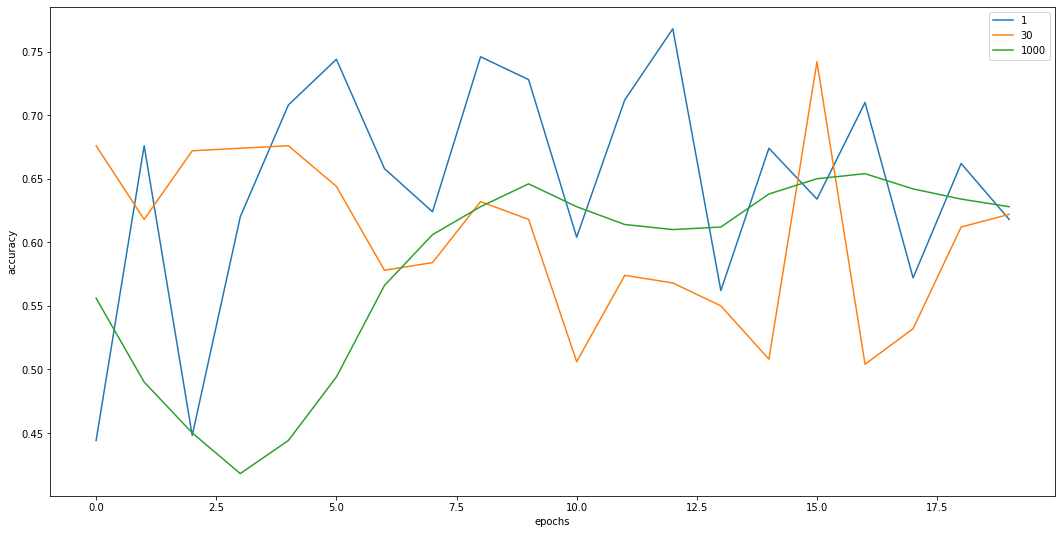

In [228]:
df2.plot(figsize=(18,9))
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend()